In [1]:
# data: Social_Network_Ads.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [7]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [9]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


#### feature scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x_scaled = sca.fit_transform(x)

In [16]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

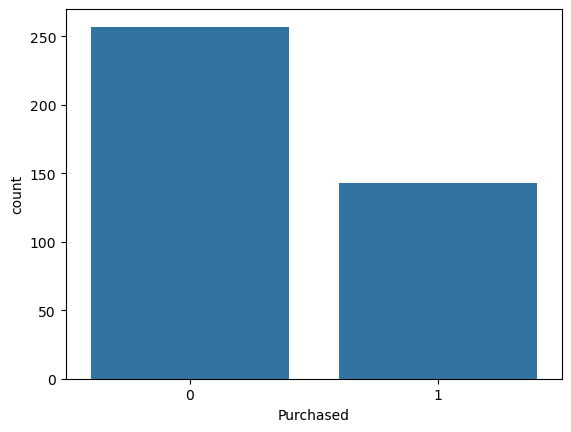

In [20]:
sns.countplot(x = y);

### cross validation

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0)

### Build the model

In [26]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

### Evaluate

In [29]:
y_pred = log.predict(x_test)

In [31]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [33]:
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

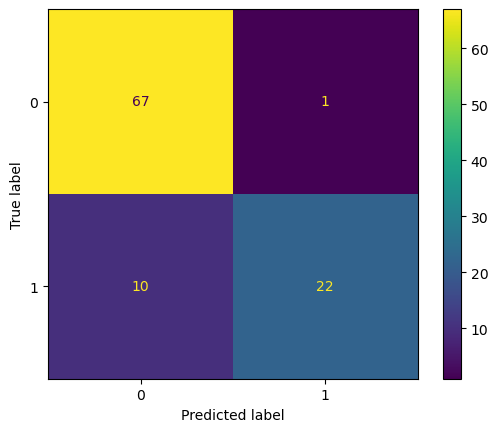

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

# 0 => purchased
# 1 => not purchase

In [39]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [43]:
# actual accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

### predict

In [46]:
new1 = [[31, 45000]]

In [48]:
log.predict(sca.transform(new1))

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])